# Megatutorial 1: Explorative Datenanalyse

In diesem Megatutorial beschäftigen wir uns mit der explorativen Datenanalyse in Python.


## Aufgaben

* Lade die Daten in `pandas`.
* Führe eine deskriptive Datenanalyse mit geeigneten, statisches Maßen durch.
* Führe eine deskriptive Datenanalyse mit Hilfe von geeigneten Visualisierungen durch.

In [3]:
!pip install -r ../requirements.txt

# Daten in pandas laden

In [4]:
from pandas import read_csv

In [ ]:
data = read_csv(
    "../data/fake_profiles.csv",
    sep=",",
    decimal=".",
    skiprows=None, #0, 1, 10
    usecols=range(1, 13)
    )

data.head(5)

,profile_pic,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,name=username,description_length,has_external_url,is_private,num_posts,num_followers,num_follows,is_fake
0,yes,0.27,0,0.0,no,53,no,no,32,1000.0,955,no
1,yes,0.00,2,0.0,no,44,no,no,286,2740.0,533,no
2,yes,0.10,2,0.0,no,0,no,yes,13,159.0,98,no
3,yes,0.00,1,0.0,no,82,no,no,679,414.0,651,no
4,yes,0.00,2,0.0,no,0,no,yes,6,151.0,126,no


sep = seperation;
decimal = Dezimalpunkte;
skiprows = geskippte Spalten

# Deskriptive Statistiken in pandas 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   profile_pic                    576 non-null    object 
 1   rel_num_numeric_char_username  576 non-null    float64
 2   words_fullname                 576 non-null    int64  
 3   rel_num_numeric_char_fullname  576 non-null    float64
 4   name=username                  576 non-null    object 
 5   description_length             576 non-null    int64  
 6   has_external_url               576 non-null    object 
 7   is_private                     576 non-null    object 
 8   num_posts                      576 non-null    int64  
 9   num_followers                  556 non-null    float64
 10  num_follows                    576 non-null    int64  
 11  is_fake                        576 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 5

In [13]:
data.describe()

,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,description_length,num_posts,num_followers,num_follows
count,576.000000,576.000000,576.000000,576.000000,576.000000,5.560000e+02,576.000000
mean,0.163837,1.460069,0.036094,22.623264,107.489583,8.835909e+04,508.381944
std,0.214096,1.052601,0.125121,37.702987,402.034431,9.262573e+05,917.981239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,3.800000e+01,57.500000
50%,0.000000,1.000000,0.000000,0.000000,9.000000,1.415000e+02,229.500000
75%,0.310000,2.000000,0.000000,34.000000,81.500000,7.285000e+02,589.500000
max,0.920000,12.000000,1.000000,150.000000,7389.000000,1.533854e+07,7500.000000


In [16]:
data["description_length"].mean()

np.float64(22.62326388888889)

In [17]:
data["description_length"].std()

np.float64(37.70298680969428)

In [18]:
data["description_length"].median()

np.float64(0.0)

In [22]:
data.select_dtypes(include="number").corr()

,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,description_length,num_posts,num_followers,num_follows
rel_num_numeric_char_username,1.000000,-0.225472,0.408567,-0.321170,-0.157442,-0.063386,-0.172413
words_fullname,-0.225472,1.000000,-0.094348,0.272522,0.073350,0.033532,0.094855
rel_num_numeric_char_fullname,0.408567,-0.094348,1.000000,-0.117521,-0.057716,-0.027388,-0.067971
description_length,-0.321170,0.272522,-0.117521,1.000000,0.144824,0.006369,0.226561
num_posts,-0.157442,0.073350,-0.057716,0.144824,1.000000,0.325895,0.098225
num_followers,-0.063386,0.033532,-0.027388,0.006369,0.325895,1.000000,-0.011009
num_follows,-0.172413,0.094855,-0.067971,0.226561,0.098225,-0.011009,1.000000


In [23]:
data.select_dtypes(exclude="number")

,profile_pic,name=username,has_external_url,is_private,is_fake
0,yes,no,no,no,no
1,yes,no,no,no,no
2,yes,no,no,yes,no
3,yes,no,no,no,no
4,yes,no,no,yes,no
...,...,...,...,...,...
571,yes,no,no,no,yes
572,yes,no,no,no,yes
573,yes,no,no,no,yes
574,yes,no,no,no,yes


In [24]:
data["profile_pic"].mode() # häufigster Wert

0    yes
Name: profile_pic, dtype: object

In [25]:
data["profile_pic"].value_counts()

profile_pic
yes    404
no     172
Name: count, dtype: int64

## Datenvisualisierung mit pandas

<Axes: >

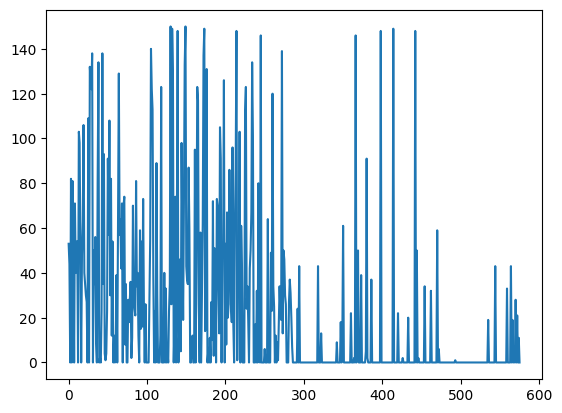

In [27]:
data["description_length"].plot()

<Axes: ylabel='Frequency'>

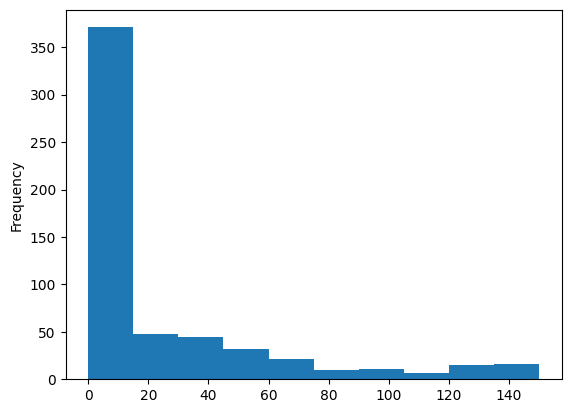

In [28]:
data["description_length"].plot(kind="hist")

<Axes: >

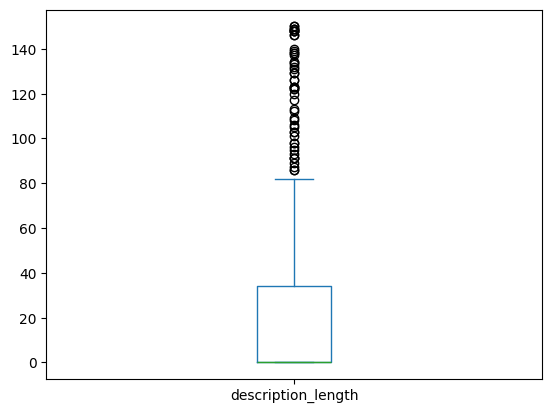

In [29]:
data["description_length"].plot(kind="box")

<Axes: ylabel='Density'>

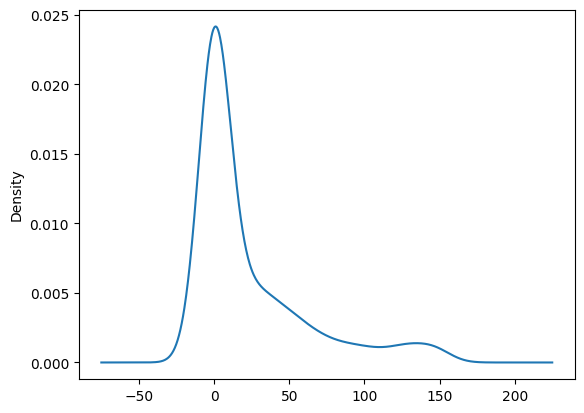

In [30]:
data["description_length"].plot(kind="kde")

<Axes: >

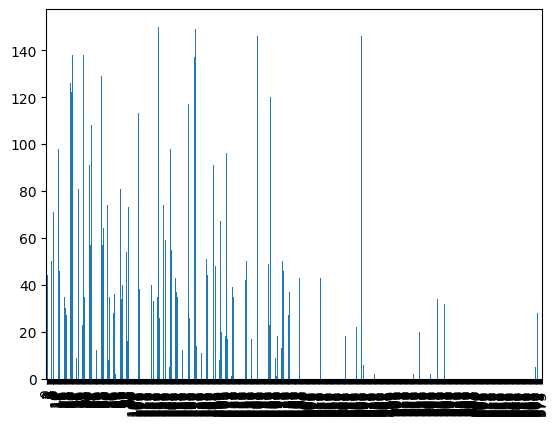

In [31]:
data["description_length"].plot(kind="bar")

<Axes: title={'center': 'Profiles with Profile Pictures'}, xlabel='Has Profile Picture', ylabel='Number of Profiles'>

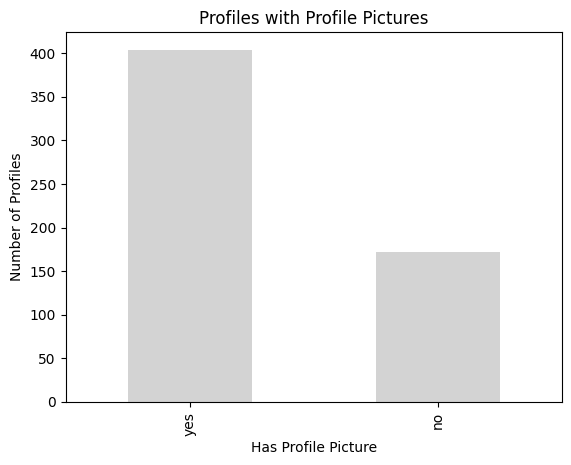

In [35]:
data["profile_pic"].value_counts().plot(
    kind="bar",
    title="Profiles with Profile Pictures",
    xlabel="Has Profile Picture",
    ylabel="Number of Profiles",
    color="lightgrey"
    )

## sonstige praktische Plots

In [39]:
from seaborn import heatmap, clustermap, pairplot

<Axes: >

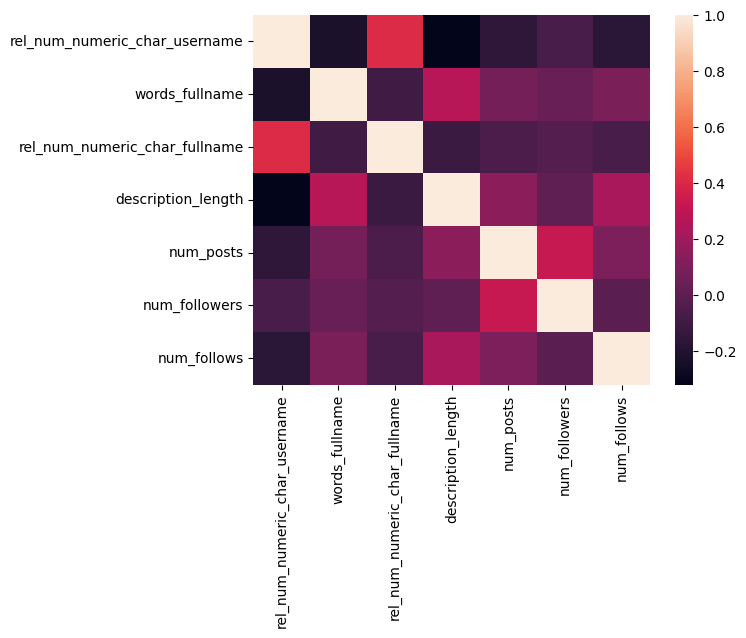

In [40]:
heatmap(
    data.select_dtypes(include="number").corr()
)

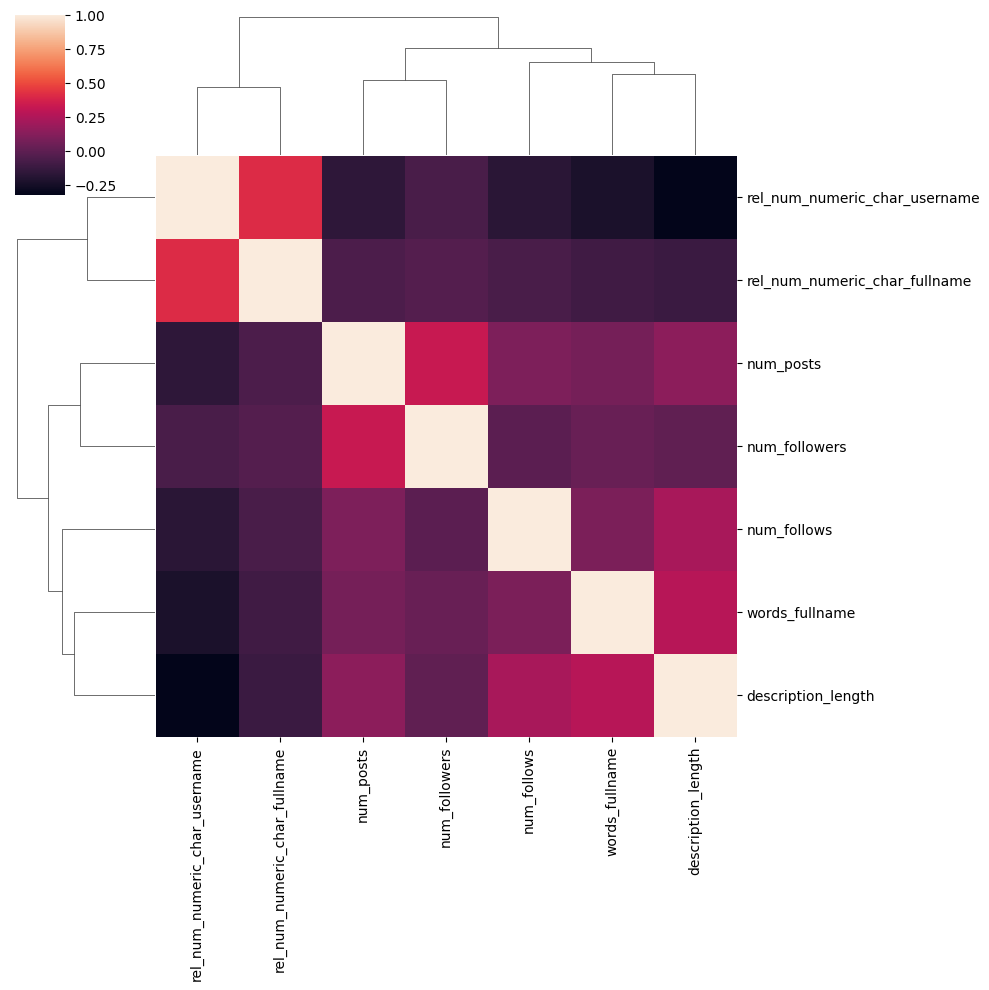

In [38]:
clustermap(
    data.select_dtypes(include="number").corr()
)

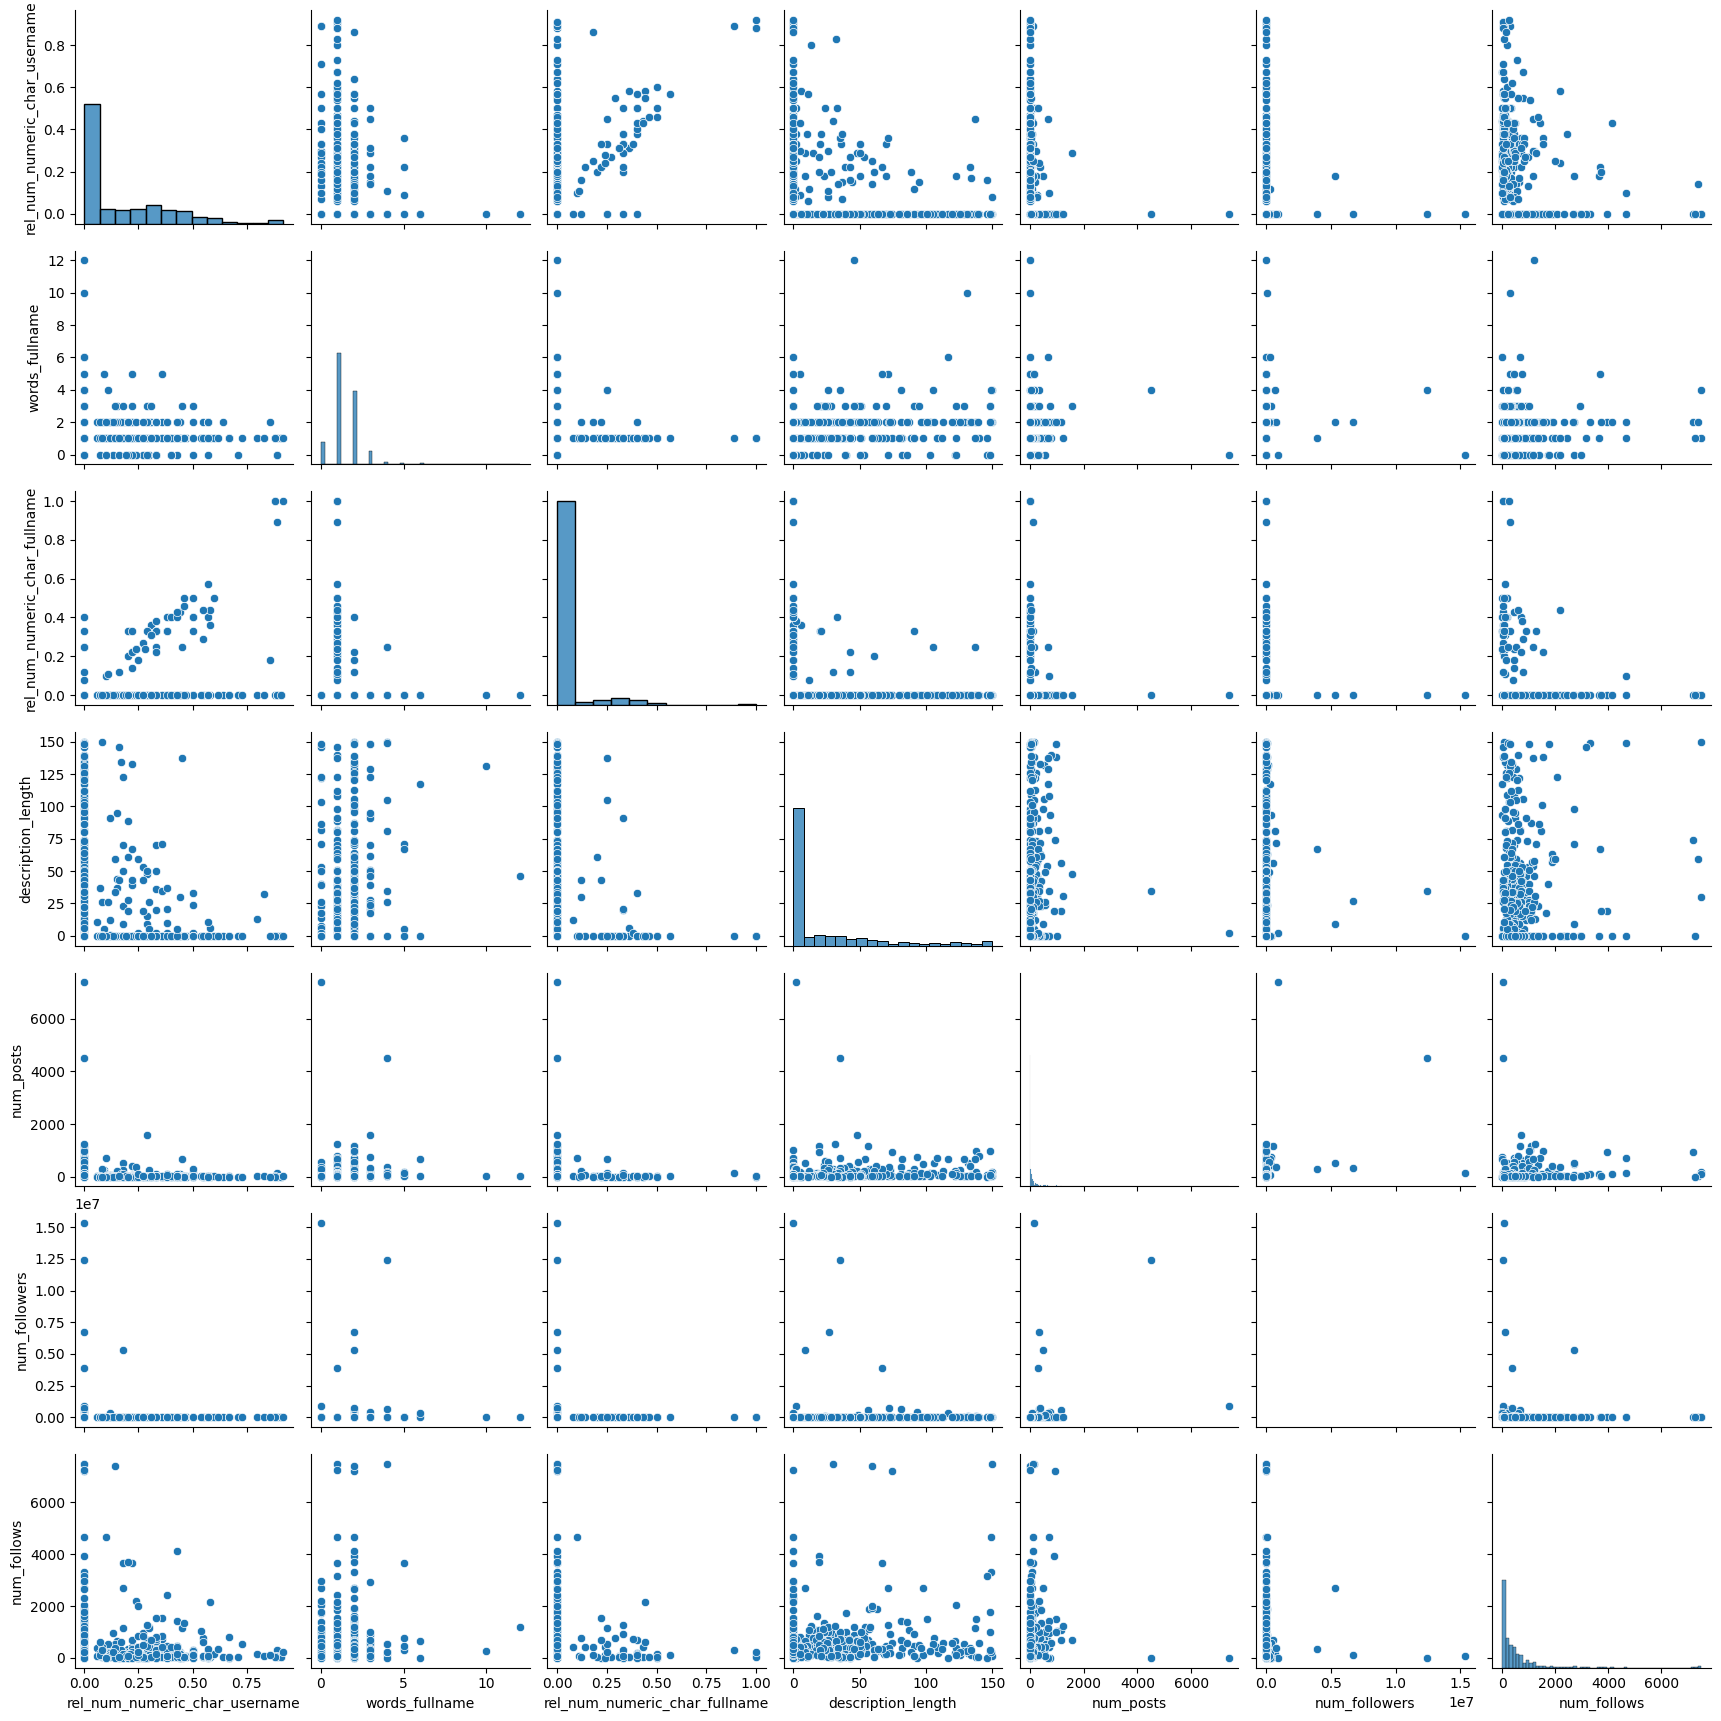

In [41]:
pairplot(data)